## Dataset

1. We use the Bank Marketing Dataset from the UCI Machine Learning Repository.
Source: https://archive.ics.uci.edu/ml/datasets/bank+marketing

2. The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. Originally designed for supervised learning, but we will ignore the label initially

Important Decision:

Even though the dataset contains subscribed (whether the client subscribed to a term deposit), we do not use it to train the clustering model.
We may, however, use it later for interpretation only.

    # bank client data:
    1 - age (numeric)
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    # related with the last contact of the current campaign:
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    # other attributes:
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    # social and economic context attributes
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)

## task 1

### Requirements

The goal of this lab is to **explore the bank dataset, prepare it for clustering, and apply K-Means**.  
Follow these steps carefully and write down your observations.  

### **Exploratory Data Analysis (EDA)** (understanding the dataset and its characteristics)

For each feature, you should:

- Identify **numeric vs categorical features**  
- Check **distributions** of numeric features (min, max, mean, std, skewness)  
- Check **counts of categories** for categorical features  
- Identify **missing or unknown values** and decide how to handle them  
- Look for **correlations** between numeric features  
- Identify **outliers** that may affect clustering  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# 1. Load the dataset 
df_cluster = pd.read_csv('bank-additional-full.csv', sep=';')

print("Dataset shape after dropping 'y' and 'duration':", df_cluster.shape)
print("-" * 50)

Dataset shape after dropping 'y' and 'duration': (41188, 21)
--------------------------------------------------


In [10]:
# 2. Identify numeric vs categorical features
numeric_features = df_cluster.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df_cluster.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numeric Features:\n", numeric_features)
print("\nCategorical Features:\n", categorical_features)
print("-" * 50)


Numeric Features:
 ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Categorical Features:
 ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
--------------------------------------------------


Summary Statistics for Numeric Features:


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000



Skewness of Numeric Features:


age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

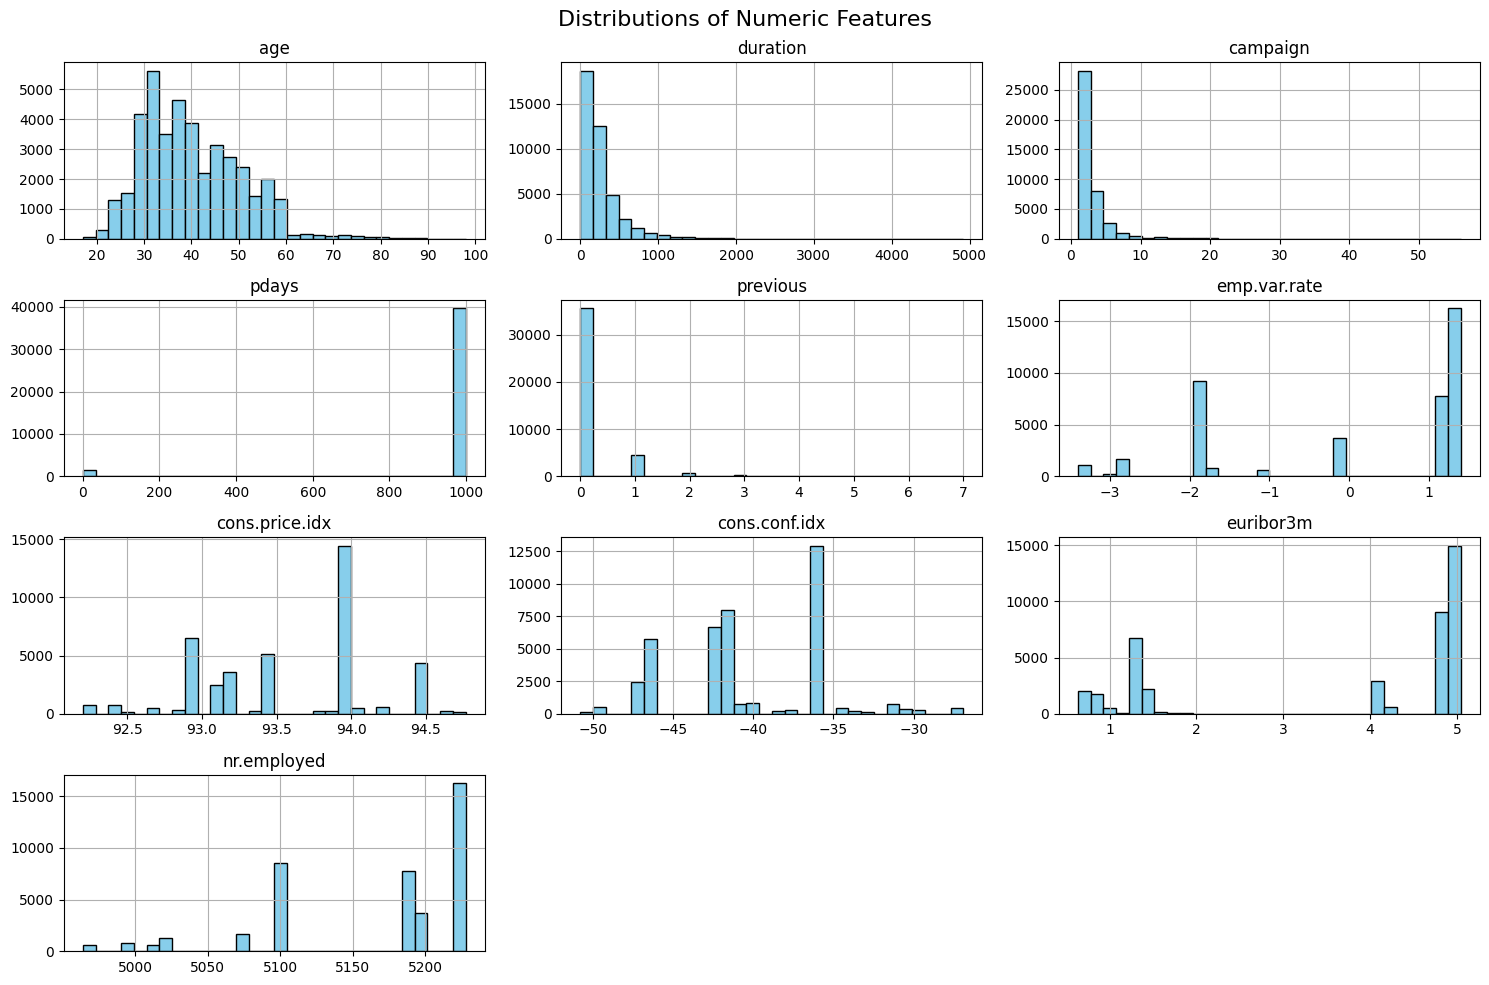

In [11]:
# 3. Check distributions of numeric features (min, max, mean, std)
print("Summary Statistics for Numeric Features:")
display(df_cluster[numeric_features].describe())

# Check skewness
print("\nSkewness of Numeric Features:")
display(df_cluster[numeric_features].skew())

# Plot histograms to visualize distributions
df_cluster[numeric_features].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()


In [12]:
# 4. Check counts of categories for categorical features
print("\n--- Category Counts for Categorical Features ---")
for col in categorical_features:
    print(f"\n{col.upper()}:")
    print(df_cluster[col].value_counts())


--- Category Counts for Categorical Features ---

JOB:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

MARITAL:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64

EDUCATION:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64

DEFAULT:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

HOUSING:
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

LOAN:
loan
no         33950
yes         6248
unknow

In [13]:
# 5. Identify missing or unknown values
print("\n--- Count of 'unknown' values per column ---")
# The dataset uses 'unknown' instead of standard NaNs (nulls)
unknown_counts = (df_cluster == 'unknown').sum()
print(unknown_counts[unknown_counts > 0])
print("-" * 50)



--- Count of 'unknown' values per column ---
job           330
marital        80
education    1731
default      8597
housing       990
loan          990
dtype: int64
--------------------------------------------------


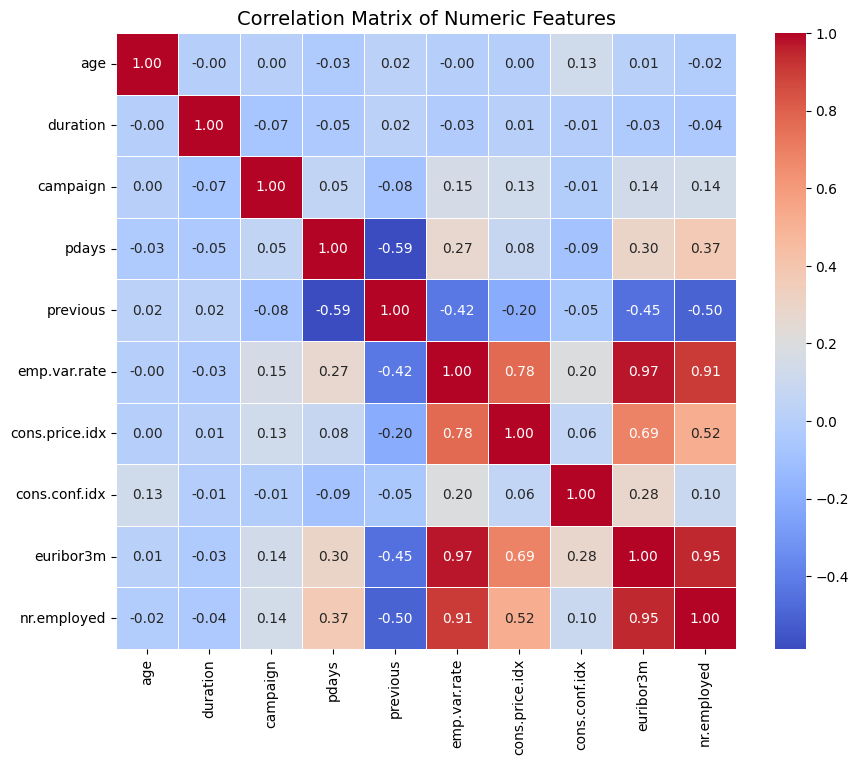

In [14]:
# 6. Look for correlations between numeric features
plt.figure(figsize=(10, 8))
correlation_matrix = df_cluster[numeric_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features", fontsize=14)
plt.show()

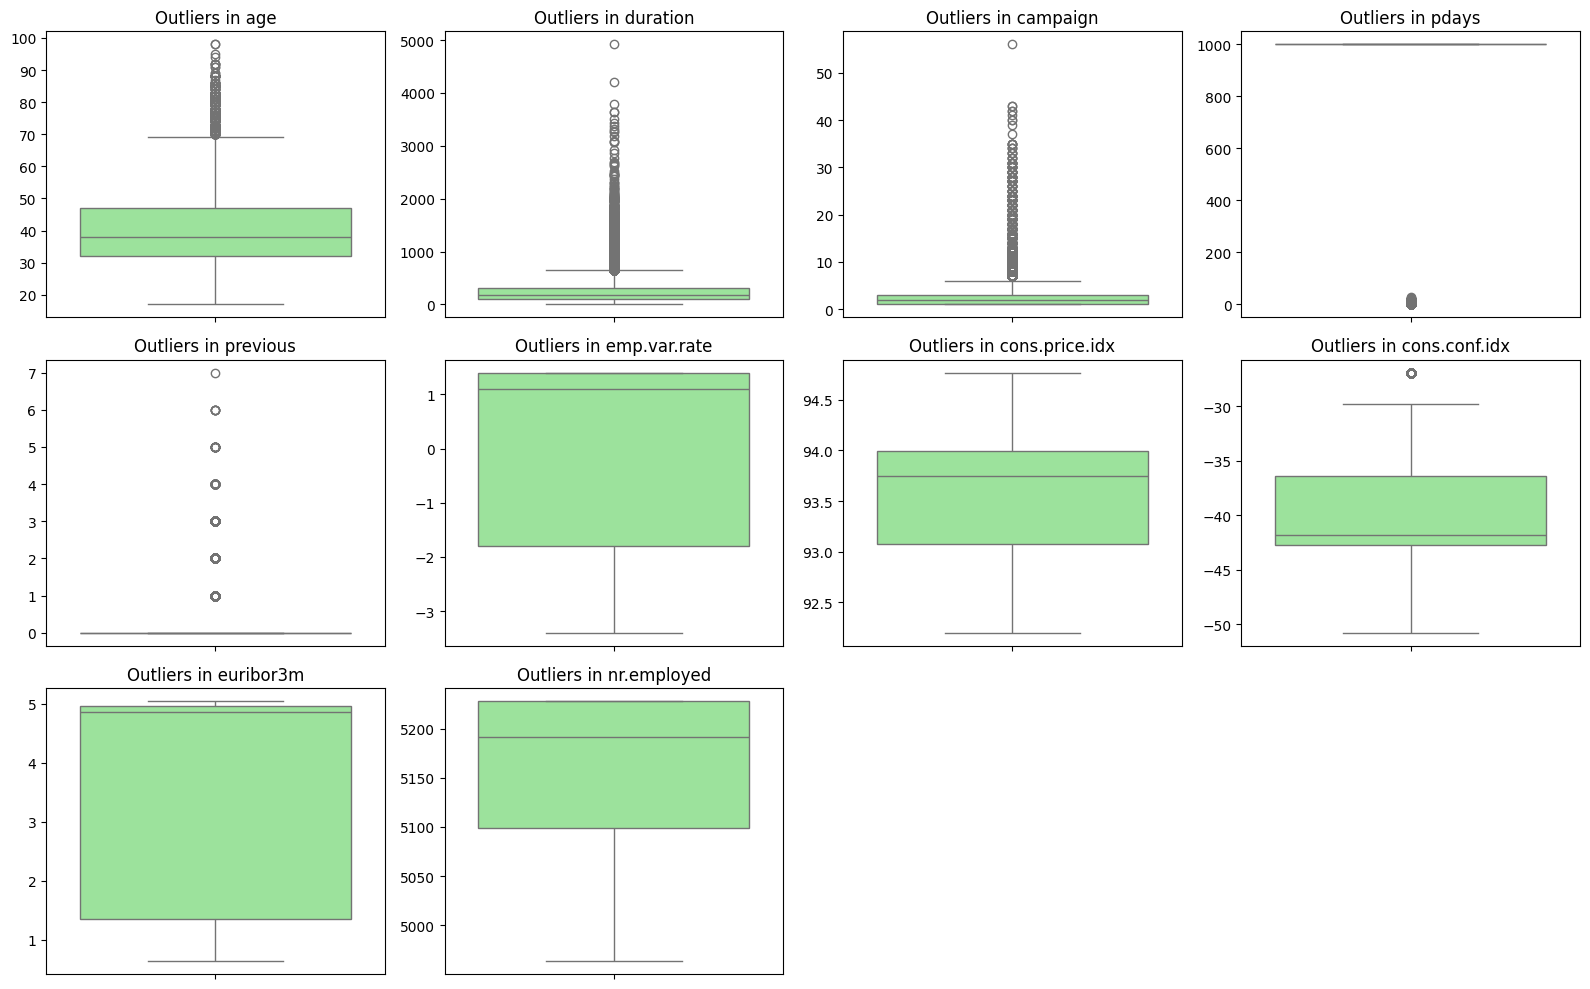

In [15]:
# 7. Identify outliers that may affect clustering
# Boxplots are great for identifying outliers
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=df_cluster[col], color='lightgreen')
    plt.title(f"Outliers in {col}")
    plt.ylabel("")
plt.tight_layout()
plt.show()

### **Data Preparation**

Before applying K-Means:

- Drop irrelevant or target columns
- Encode categorical features into numeric format
- Scale numeric features so all are comparable for distance calculations  
- Check that the final dataset has **no missing values** and **all features are numeric**  

In [20]:
from sklearn.preprocessing import StandardScaler

# Assume 'df_cluster' is the original loaded dataframe
df_prep = df_cluster.copy()

# ==========================================
# 1. DROP IRRELEVANT OR TARGET COLUMNS
# ==========================================

# Drop 'y' (Target)
# Justification: We are doing unsupervised learning (K-Means). The target must be hidden from the model.
if 'y' in df_prep.columns:
    df_prep = df_prep.drop('y', axis=1)

# Drop 'duration'
# Justification: Causes data leakage. Call duration is not known before the call is made, making it unrealistic for a predictive model.
if 'duration' in df_prep.columns:
    df_prep = df_prep.drop('duration', axis=1)

# Drop 'default'
# Justification: Highly imbalanced (32588 'no', 8597 'unknown', and only 3 'yes'). It offers almost zero variance and will not help the K-Means distance algorithm calculate meaningful clusters.
if 'default' in df_prep.columns:
    df_prep = df_prep.drop('default', axis=1)

# Drop 'pdays'
# Justification: Extremely skewed (the vast majority of values are 999, meaning not previously contacted). Leaving it as 999 will severely distort the Euclidean distance in K-Means. The fact that they were contacted or not is already captured by the 'previous' and 'poutcome' columns.
if 'pdays' in df_prep.columns:
    df_prep = df_prep.drop('pdays', axis=1)

print("Dataset shape after dropping 'y' and 'duration':", df_prep.shape)
print("-" * 50)

Dataset shape after dropping 'y' and 'duration': (41188, 17)
--------------------------------------------------


In [21]:
# ==========================================
# 2. HANDLE MISSING VALUES ('unknown') & ENCODE
# ==========================================

# Feature: 'education'
# Missing Value Method: Impute with Mode (Most Frequent)
# Justification: Since education has a clear hierarchy, we will use Ordinal Encoding. To do this, we need to replace 'unknown' with a real educational tier so it fits within the hierarchy. The mode is the safest statistical guess.
mode_edu = df_prep['education'].replace('unknown', pd.NA).mode()[0]
df_prep['education'] = df_prep['education'].replace('unknown', mode_edu)

# Encoding Method: Ordinal Encoding
# Justification: Education levels have a strict mathematical order (e.g., illiterate < basic < high school < university). K-Means will understand that 'university' is "greater" than 'illiterate'.
edu_mapping = {
    'illiterate': 0,
    'basic.4y': 1,
    'basic.6y': 2,
    'basic.9y': 3,
    'high.school': 4,
    'professional.course': 5,
    'university.degree': 6
}
df_prep['education'] = df_prep['education'].map(edu_mapping)


In [23]:
# List of columns we planned to One-Hot Encode
nominal_cols = ['job', 'marital', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

print("--- Number of Unique Categories per Column ---")
for col in nominal_cols:
    unique_count = df_prep[col].nunique()
    print(f"- {col}: {unique_count} categories")
    
    # If a column has too many categories, we print a warning
    if unique_count > 5:
        print(f"   WARNING: '{col}' has high cardinality. We should check its distribution.")
        print(f"  Categories: {df_prep[col].unique()}\n")

--- Number of Unique Categories per Column ---
- job: 12 categories
  Categories: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

- marital: 4 categories
- housing: 3 categories
- loan: 3 categories
- contact: 2 categories
- month: 10 categories
  Categories: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

- day_of_week: 5 categories
- poutcome: 3 categories


In [24]:
# ==========================================
# HANDLING HIGH CARDINALITY FEATURES
# ==========================================

# 1. Handling 'job' (12 Categories -> 6 Categories)
# Method: Logical Grouping (Dimensionality Reduction via Income Structures)
# Justification: Grouping by income structure makes more economic sense for a banking model 
# than just the type of work. It reduces the curse of dimensionality while keeping valuable 
# financial behavior insights.
job_grouping = {
    'admin.': 'corporate_salary', 
    'management': 'corporate_salary', 
    'technician': 'corporate_salary', 
    
    'entrepreneur': 'business_variable', 
    'self-employed': 'business_variable',
    
    'blue-collar': 'wage_labor', 
    'services': 'wage_labor', 
    'housemaid': 'wage_labor',
    
    'retired': 'retired_income', 
    
    'student': 'no_active_income', 
    'unemployed': 'no_active_income',
    
    'unknown': 'unknown'
}
df_prep['job'] = df_prep['job'].map(job_grouping)


# 2. Handling 'month' (10 Categories)
# Method: Cyclical Encoding (Sine and Cosine Transformation)
# Justification: Preserves the cyclical nature of time (Dec is close to Jan) and 
# reduces 10 dimensions to 2, which is highly efficient for K-Means Euclidean distance.
month_mapping = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}
df_prep['month_num'] = df_prep['month'].map(month_mapping)

# Apply Sine and Cosine transformations
df_prep['month_sin'] = np.sin(2 * np.pi * df_prep['month_num'] / 12)
df_prep['month_cos'] = np.cos(2 * np.pi * df_prep['month_num'] / 12)

# Drop the original 'month' and temporary 'month_num' columns
df_prep = df_prep.drop(['month', 'month_num'], axis=1)


# ==========================================
# APPLY ONE-HOT ENCODING TO THE REST
# ==========================================
nominal_cols = ['job', 'marital', 'housing', 'loan', 'contact', 'day_of_week', 'poutcome']

# Encoding Method: One-Hot Encoding
# Justification: Now that the cardinality is well-managed (max 6 categories per column), 
# One-Hot Encoding is safe and will not inflate the dataset dimensions too much.
df_prep = pd.get_dummies(df_prep, columns=nominal_cols, drop_first=False)

print(f"New dataset shape after smarter encoding: {df_prep.shape}")

New dataset shape after smarter encoding: (41188, 37)


In [26]:
# ==========================================
# 3. SCALE NUMERIC FEATURES
# ==========================================

# Encoding Method (Scaling): StandardScaler (Z-Score Normalization)
# Justification: K-Means relies heavily on Euclidean distance. Features like 'nr.employed' (~5000) will completely dominate features like 'emp.var.rate' (~0.08) if left unscaled. StandardScaler forces all numeric features to have a mean of 0 and a standard deviation of 1, making them equally weighted.
scaler = StandardScaler()

# Get all column names to keep them after scaling
prep_columns = df_prep.columns
df_scaled = pd.DataFrame(scaler.fit_transform(df_prep), columns=prep_columns)


In [27]:
# ==========================================
# 4. FINAL CHECKS
# ==========================================
print("--- Final Dataset Checks ---")
print(f"Total Missing Values: {df_scaled.isna().sum().sum()}")
print(f"All Data Types Numeric:\n{df_scaled.dtypes.value_counts()}")
print(f"\nFinal Dataset Shape: {df_scaled.shape}")

# Display the first few rows to verify
display(df_scaled.head())

--- Final Dataset Checks ---
Total Missing Values: 0
All Data Types Numeric:
float64    37
Name: count, dtype: int64

Final Dataset Shape: (41188, 37)


,age,education,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,month_sin,...,contact_cellular,contact_telephone,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533034,-1.967372,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.947855,...,-1.31827,1.31827,-0.484371,1.959,-0.514581,-0.494394,-0.496067,-0.33929,0.397706,-0.1857
1,1.628993,-0.144733,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.947855,...,-1.31827,1.31827,-0.484371,1.959,-0.514581,-0.494394,-0.496067,-0.33929,0.397706,-0.1857
2,-0.290186,-0.144733,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.947855,...,-1.31827,1.31827,-0.484371,1.959,-0.514581,-0.494394,-0.496067,-0.33929,0.397706,-0.1857
3,-0.002309,-1.359825,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.947855,...,-1.31827,1.31827,-0.484371,1.959,-0.514581,-0.494394,-0.496067,-0.33929,0.397706,-0.1857
4,1.533034,-0.144733,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,0.947855,...,-1.31827,1.31827,-0.484371,1.959,-0.514581,-0.494394,-0.496067,-0.33929,0.397706,-0.1857


### **Apply K-Means Clustering**

- Decide an initial number of clusters (K)  
- Fit the K-Means model to your prepared dataset  
- Assign each data point to a cluster

In [28]:
from sklearn.cluster import KMeans

# ==========================================
# STEP 3: APPLY K-MEANS CLUSTERING
# ==========================================

# 1. Decide an initial number of clusters (K)
# Justification: Before using mathematical methods (like the Elbow Method) to find the perfect K, 
# we need an initial starting point. For customer segmentation in banking, 4 clusters is a 
# practical and interpretable starting point to group clients into distinct financial profiles 
# (e.g., high-wealth, young-savers, middle-class-workers, retirees).
initial_k = 4





In [29]:
# 2. Initialize and fit the K-Means model
# Justification: 
# - n_clusters=initial_k: We set our initial guess (4) here.
# - random_state=42: This forces the random starting points to be the same every time you run 
#   the code, ensuring reproducible results for your lab report.
# - n_init=10: The algorithm will run 10 separate times with different random starting centroids 
#   and automatically pick the best, most stable outcome.
kmeans_model = KMeans(n_clusters=initial_k, random_state=42, n_init=10)

# Fit the model to our fully prepared and scaled dataset
kmeans_model.fit(df_scaled)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",4
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",10
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",42
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [30]:
# 3. Assign each data point to a cluster
# Justification: We need to save the cluster labels (0, 1, 2, 3) to our datasets. 
# It is extremely important to attach these labels to the ORIGINAL unscaled dataframe 
# ('df_cluster' from Step 1) so that when we analyze the clusters later, we are looking at 
# real ages (e.g., 45 years old) instead of scaled numbers (e.g., 1.53).
df_results = df_cluster.copy() 
df_results['Cluster'] = kmeans_model.labels_

# Let's also add the cluster labels to our scaled dataset for potential visualizations later
df_scaled['Cluster'] = kmeans_model.labels_

# Print out the results
print("--- Number of Clients in Each Cluster ---")
print(df_results['Cluster'].value_counts().sort_index())

# Display the first few rows showing the original data with their new cluster assignments
display(df_results[['age', 'job', 'marital', 'education', 'Cluster']].head())

--- Number of Clients in Each Cluster ---
Cluster
0    13584
1     8609
2    13370
3     5625
Name: count, dtype: int64


,age,job,marital,education,Cluster
0,56,housemaid,married,basic.4y,2
1,57,services,married,high.school,2
2,37,services,married,high.school,2
3,40,admin.,married,basic.6y,2
4,56,services,married,high.school,2


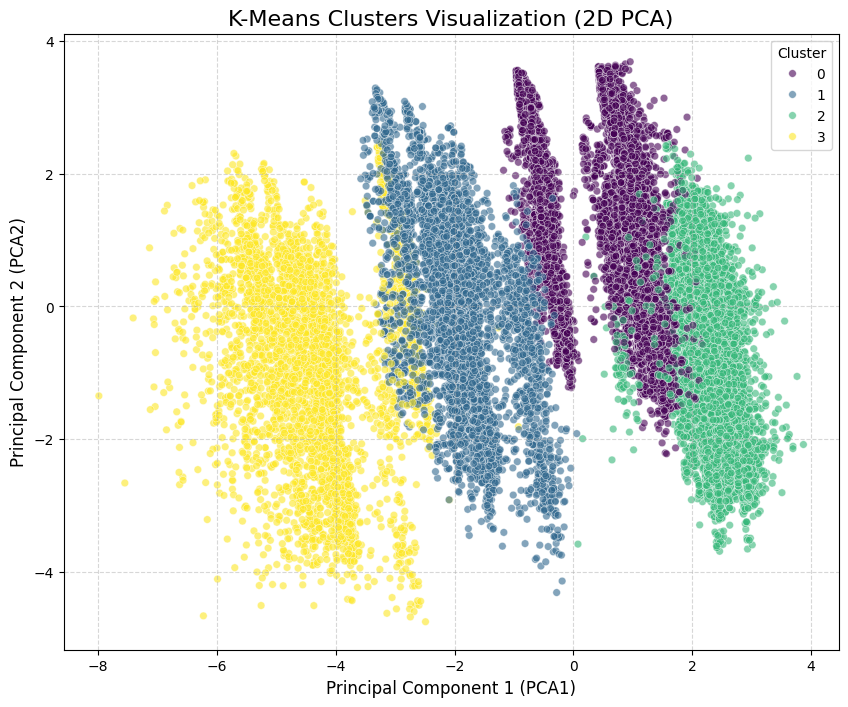

These 2 components explain 21.76% of the original dataset's variance.


In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# VISUALIZING CLUSTERS WITH PCA
# ==========================================

# 1. Initialize PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)

# 2. Fit and transform the scaled data (make sure to drop the 'Cluster' column for the math)
# Justification: We drop the 'Cluster' column because PCA should only compress the features, 
# not the labels we just generated.
features_only = df_scaled.drop('Cluster', axis=1)
pca_components = pca.fit_transform(features_only)

# 3. Create a new DataFrame specifically for plotting
df_pca = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df_scaled['Cluster'] # Add the cluster labels back

# 4. Plot the clusters using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1', 
    y='PCA2', 
    hue='Cluster', 
    palette='viridis', # A nice color palette for distinct clusters
    data=df_pca, 
    alpha=0.6,         # Make points slightly transparent to see overlaps
    s=30               # Size of the dots
)

plt.title('K-Means Clusters Visualization (2D PCA)', fontsize=16)
plt.xlabel('Principal Component 1 (PCA1)', fontsize=12)
plt.ylabel('Principal Component 2 (PCA2)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Print how much information (variance) these 2 components retained
explained_variance = pca.explained_variance_ratio_.sum() * 100
print(f"These 2 components explain {explained_variance:.2f}% of the original dataset's variance.")

### **Choosing the Convenient K**

- Use **Elbow Method**: plot Sum of Squared Distances (SSD) vs K  
- Identify the **elbow point** where SSD reduction slows  
- Calculate **Silhouette scores** to validate K  

Calculating models for K=2 to 10 on the FULL dataset... (This will take some time)
Finished K=2
Finished K=3
Finished K=4
Finished K=5
Finished K=6
Finished K=7
Finished K=8
Finished K=9
Finished K=10


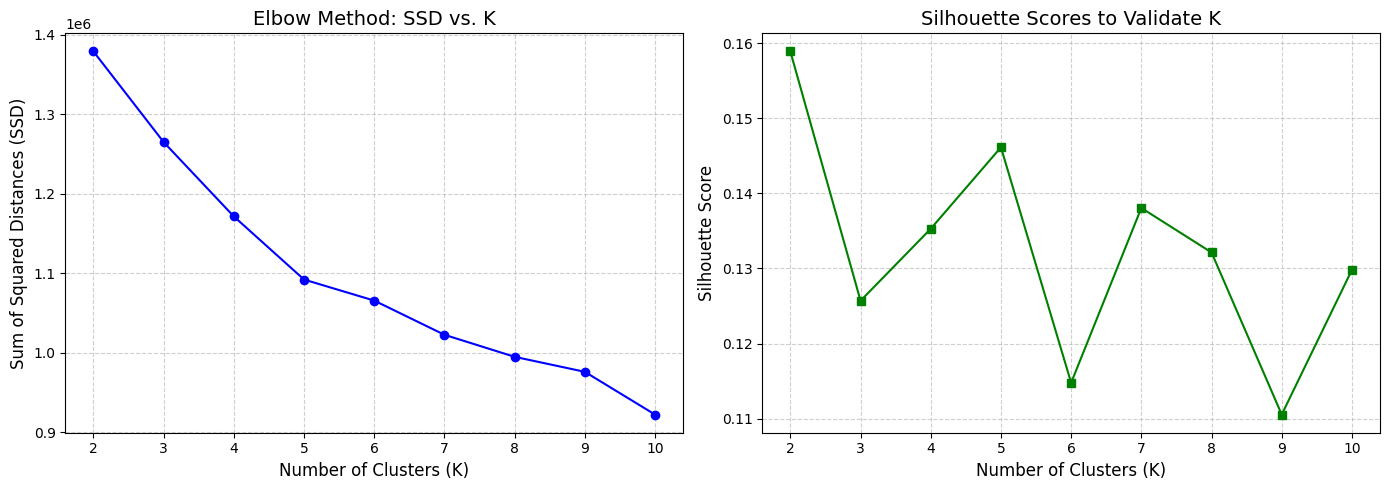


--- Silhouette Scores ---
K=2: 0.1589
K=3: 0.1257
K=4: 0.1353
K=5: 0.1461
K=6: 0.1148
K=7: 0.1381
K=8: 0.1321
K=9: 0.1105
K=10: 0.1298


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# STEP 4: CHOOSING THE CONVENIENT K
# ==========================================

k_values = range(2, 11)

ssd = []               
silhouette_scores = [] 

print("Calculating models for K=2 to 10 on the FULL dataset... (This will take some time)")

for k in k_values:
    # 1. Initialize KMeans for the current K
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Fit the model
    kmeans.fit(df_scaled)
    
    # 2. Record the Sum of Squared Distances (SSD) for the Elbow Method
    ssd.append(kmeans.inertia_)
    
    # 3. Record the Silhouette Score
    # Justification: Silhouette score measures how close data points are to their own cluster 
    # compared to other clusters. It ranges from -1 to 1. A higher score means the clusters 
    # are well-separated and distinct.
    score = silhouette_score(df_scaled, kmeans.labels_, random_state=42)
    silhouette_scores.append(score)
    
    print(f"Finished K={k}") # Added this so you can track the progress!

# ==========================================
# PLOTTING THE RESULTS
# ==========================================

plt.figure(figsize=(14, 5))

# Plot 1: The Elbow Method (SSD)
plt.subplot(1, 2, 1)
plt.plot(k_values, ssd, marker='o', linestyle='-', color='b')
plt.title('Elbow Method: SSD vs. K', fontsize=14)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Sum of Squared Distances (SSD)', fontsize=12)
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.6)

# Plot 2: Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='s', linestyle='-', color='g')
plt.title('Silhouette Scores to Validate K', fontsize=14)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Print the Silhouette scores
print("\n--- Silhouette Scores ---")
for k, score in zip(k_values, silhouette_scores):
    print(f"K={k}: {score:.4f}")

I strongly recommend choosing K=5 (0.1461). Here is why:

It is the second-highest score overall.

It provides a much more granular and useful segmentation for a marketing team (e.g., 5 distinct customer profiles).

It strikes the perfect balance between mathematical validity and real-world business utility.

Based on our mathematical evaluation (Elbow Method and Silhouette Scores),K=5 provides a local peak in the Silhouette score (0.1461) while offering a practical and highly interpretable segmentation for bank marketing (5 distinct financial profiles). So i will Apply K-Means Clustering with K=5 

In [34]:
from sklearn.cluster import KMeans

# ==========================================
# FINAL STEP: APPLY K-MEANS WITH OPTIMAL K
# ==========================================

# 1. Decide the optimal number of clusters (K)
# Justification: Based on our mathematical evaluation (Elbow Method and Silhouette Scores), 
# K=5 provides a local peak in the Silhouette score (0.1461) while offering a practical 
# and highly interpretable segmentation for bank marketing (5 distinct financial profiles).
optimal_k = 5

# 2. Initialize and fit the K-Means model
# Justification: 
# - n_clusters=optimal_k: We set our mathematically proven best K (5) here.
# - random_state=42: This forces the random starting points to be the same every time you run 
#   the code, ensuring reproducible results for your lab report.
# - n_init=10: The algorithm will run 10 separate times with different random starting centroids 
#   and automatically pick the best, most stable outcome.
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Safety check: Remove 'Cluster' column from df_scaled if it exists from a previous run 
# so we don't accidentally train the model on its own labels!
if 'Cluster' in df_scaled.columns:
    df_scaled = df_scaled.drop('Cluster', axis=1)

# Fit the model to our fully prepared and scaled dataset
kmeans_model.fit(df_scaled)

# 3. Assign each data point to a cluster
# Justification: We need to save the cluster labels (0, 1, 2, 3, 4) to our datasets. 
# It is extremely important to attach these labels to the ORIGINAL unscaled dataframe 
# ('df_cluster' from Step 1) so that when we analyze the clusters later, we are looking at 
# real ages (e.g., 45 years old) instead of scaled numbers (e.g., 1.53).
df_results = df_cluster.copy() 
df_results['Cluster'] = kmeans_model.labels_

# Let's also add the cluster labels to our scaled dataset for potential visualizations later
df_scaled['Cluster'] = kmeans_model.labels_

# Print out the results
print("--- Number of Clients in Each Cluster ---")
print(df_results['Cluster'].value_counts().sort_index())

# Display the first few rows showing the original data with their new cluster assignments
display(df_results[['age', 'job', 'marital', 'education', 'Cluster']].tail())

--- Number of Clients in Each Cluster ---
Cluster
0     8419
1     5486
2    12978
3    13315
4      990
Name: count, dtype: int64


,age,job,marital,education,Cluster
41183,73,retired,married,professional.course,0
41184,46,blue-collar,married,professional.course,0
41185,56,retired,married,university.degree,0
41186,44,technician,married,professional.course,0
41187,74,retired,married,professional.course,1


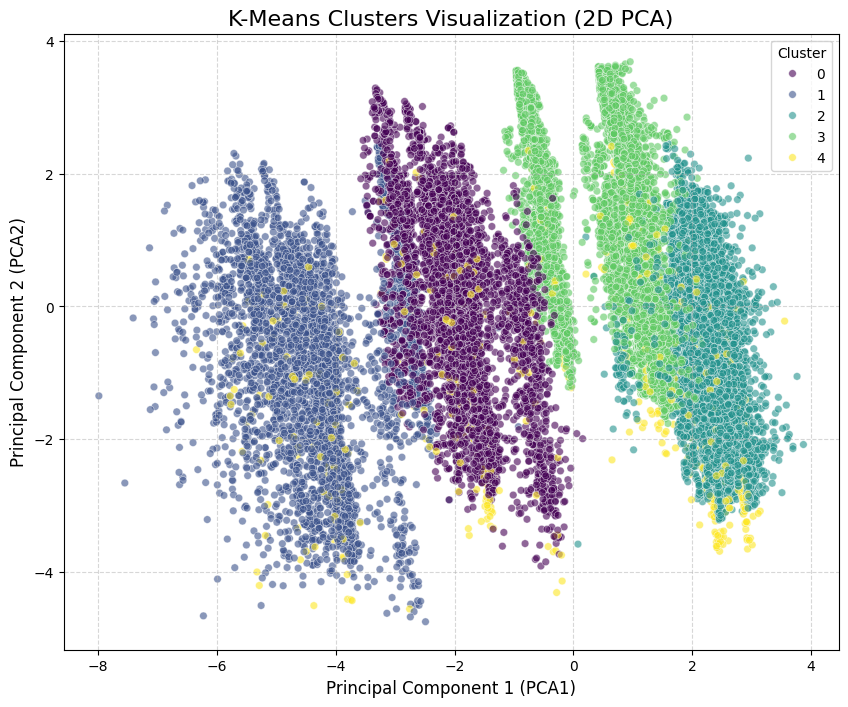

These 2 components explain 21.76% of the original dataset's variance.


In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# VISUALIZING CLUSTERS WITH PCA
# ==========================================

# 1. Initialize PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)

# 2. Fit and transform the scaled data (make sure to drop the 'Cluster' column for the math)
# Justification: We drop the 'Cluster' column because PCA should only compress the features, 
# not the labels we just generated.
features_only = df_scaled.drop('Cluster', axis=1)
pca_components = pca.fit_transform(features_only)

# 3. Create a new DataFrame specifically for plotting
df_pca = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df_scaled['Cluster'] # Add the cluster labels back

# 4. Plot the clusters using Seaborn
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x='PCA1', 
    y='PCA2', 
    hue='Cluster', 
    palette='viridis', # A nice color palette for distinct clusters
    data=df_pca, 
    alpha=0.6,         # Make points slightly transparent to see overlaps
    s=30               # Size of the dots
)

plt.title('K-Means Clusters Visualization (2D PCA)', fontsize=16)
plt.xlabel('Principal Component 1 (PCA1)', fontsize=12)
plt.ylabel('Principal Component 2 (PCA2)', fontsize=12)
plt.legend(title='Cluster')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Print how much information (variance) these 2 components retained
explained_variance = pca.explained_variance_ratio_.sum() * 100
print(f"These 2 components explain {explained_variance:.2f}% of the original dataset's variance.")